# Quicken Quickbooks Upgrade Assignment
- Rob's solutions

# 

# Imports

#### Standard library imports

In [257]:
import sys
sys.path.append("../")

import os

#### Third party imports

In [258]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import metrics
import plotly.graph_objects as go
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#### Local application imports

In [259]:
%load_ext autoreload
%autoreload 2

from pkg_dir.config import *
from pkg_dir.src.utils import *
from pkg_dir.src.functions import *
from pkg_dir.src.parameters import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 

# Importing data

In [260]:
df = pd.read_csv('../pkg_dir/data/intuit.csv')

# 

# Data exploration

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20000 non-null  int64  
 1   sex         20000 non-null  object 
 2   bizflag     20000 non-null  int64  
 3   zip         20000 non-null  int64  
 4   zip_bins    20000 non-null  int64  
 5   numords     20000 non-null  int64  
 6   dollars     20000 non-null  float64
 7   last        20000 non-null  int64  
 8   sincepurch  20000 non-null  int64  
 9   version1    20000 non-null  int64  
 10  owntaxprod  20000 non-null  int64  
 11  upgraded    20000 non-null  int64  
 12  res1        20000 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 2.0+ MB


In [262]:
df.describe()

,id,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
count,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.244400,54350.2613,10.499000,2.079450,93.581000,15.779650,15.751400,0.208250,0.027100,0.215600,0.048050
std,5773.647028,0.429742,32776.4059,5.766755,1.246361,82.601398,9.527331,10.020435,0.406067,0.162379,0.411248,0.213877
min,1.000000,0.000000,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,0.000000,23451.0000,5.000000,1.000000,37.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,0.000000,55402.5000,10.500000,2.000000,71.000000,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.250000,0.000000,89018.7500,15.250000,3.000000,124.500000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000
max,20000.000000,1.000000,99999.0000,20.000000,5.000000,937.500000,36.000000,36.000000,1.000000,1.000000,1.000000,1.000000


In [263]:
## Number of positive labels in results

mba263.tabulate(df['res1'])

,Name,Count,Frequency
0,0,19039,0.95195
1,1,961,0.04805


In [264]:
## Do all customers who upgraded have Quickbooks version 2?

df.groupby(
    [
        'upgraded',
        'version1',
    ]
).agg(
    cnt=('id', 'count')
)

cnt
upgraded version1       
0        0         11523
         1          4165
1        0          4312

# 

# Wrangling

##### Generating dummy variables

###### Column: `sex`

In [265]:
df = pd.concat(
    [
        df,
        pd.get_dummies(df['sex'], prefix='sex', drop_first=True)
    ],
    axis=1
)

###### Column: `zip_bins`

In [266]:
df = pd.concat(
    [
        df,
        pd.get_dummies(df['zip_bins'], prefix='zip_bins', drop_first=True)
    ],
    axis=1
)

# 

# Modeling
- Models developed:
    - M1: Logistic regression
    - M2: 

## M1: Logistic regression

#### Model

In [269]:
dfm1 = df.copy()

In [273]:
## Defining label and features for the model

m1_l = ['res1']

m1_f = [
    # 'id',
    # 'sex',
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
]

In [274]:
m1 = mba263.logit(
    dfm1[m1_l],
    dfm1[m1_f]
)

Optimization terminated successfully.
         Current function value: 0.170171
         Iterations 8


#### Coefficients

In [275]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                20000
Model:                    Mba263Logit   Df Residuals:                    19969
Method:                           MLE   Df Model:                           30
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.1171
Time:                        15:31:22   Log-Likelihood:                -3403.4
converged:                       True   LL-Null:                       -3854.7
Covariance Type:            nonrobust   LLR p-value:                1.835e-170
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8086      0.634     -1.276      0.202      -2.051       0.434
sex_F          -0.8114      0.626     -1.296      0.195      -2.038       0.415
sex_M          -0.7002      0.622     -1.126      0.260      -1.919       0.519
sex_U          -0.6942      0.630     -1.102      0.270      -1.929       0.540
bizflag        -0.0921      0.087     -1.054      0.292      -0.263       0.079
zip_bins_2     -2.0447      0.184    -11.094      0.000      -2.406      -1.683
zip_bins_3     -2.0254      0.186    -10.890      0.000      -2.390      -1.661
zip_bins_4     -2.1785      0.194    -11.212      0.000      -2.559      -1.798
zip_bins_5     -1.9960      0.181    -11.018      0.000      -2.351      -1.641
zip_bins_6     -2.0928      0.186    -11.232      0.000      -2.458      -1.728
zip_bins_7     -1.9593      0.181    -10.811      0.000      -2.314      -1.604
zip_bins_8     -2.6290      0.232    -11.334      0.000      -3.084      -2.174
zip_bins_9     -1.9577      0.177    -11.068      0.000      -2.304      -1.611
zip_bins_10    -1.7610      0.167    -10.545      0.000      -2.088      -1.434
zip_bins_11    -2.0902      0.185    -11.320      0.000      -2.452      -1.728
zip_bins_12    -1.6074      0.160    -10.040      0.000      -1.921      -1.294
zip_bins_13    -2.1739      0.192    -11.319      0.000      -2.550      -1.797
zip_bins_14    -2.3360      0.207    -11.279      0.000      -2.742      -1.930
zip_bins_15    -1.8666      0.174    -10.758      0.000      -2.207      -1.527
zip_bins_16    -2.2166      0.199    -11.152      0.000      -2.606      -1.827
zip_bins_17    -2.1895      0.194    -11.262      0.000      -2.571      -1.808
zip_bins_18    -1.7962      0.170    -10.575      0.000      -2.129      -1.463
zip_bins_19    -2.1626      0.191    -11.348      0.000      -2.536      -1.789
zip_bins_20    -2.0490      0.186    -11.000      0.000      -2.414      -1.684
numords         0.2107      0.031      6.862      0.000       0.151       0.271
dollars         0.0010      0.000      2.446      0.014       0.000       0.002
last           -0.0519      0.004    -12.959      0.000      -0.060      -0.044
sincepurch      0.0064      0.006      0.999      0.318      -0.006       0.019
version1        0.6581      0.141      4.672      0.000       0.382       0.934
owntaxprod      0.0505      0.188      0.269      0.788      -0.318       0.419
upgraded        0.8045      0.138      5.844      0.000       0.535       1.074
===============================================================================
"""

In [276]:
mba263.odds_ratios(m1)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
sex_F,0.444240,0.278054,1.998750,0.046,-0.095184,0.983664
sex_M,0.496484,0.308791,1.630605,0.103,-0.102569,1.095538
sex_U,0.499470,0.314606,1.590974,0.112,-0.110866,1.109806
bizflag,0.912018,0.079718,1.103670,0.270,0.757365,1.066671
zip_bins_2,0.129424,0.023853,36.498171,0.000,0.083150,0.175698
zip_bins_3,0.131945,0.024539,35.374425,0.000,0.084339,0.179551
zip_bins_4,0.113206,0.021996,40.316434,0.000,0.070534,0.155878
zip_bins_5,0.135881,0.024616,35.103853,0.000,0.088126,0.183636
zip_bins_6,0.123335,0.022981,38.147483,0.000,0.078752,0.167918
zip_bins_7,0.140960,0.025546,33.627544,0.000,0.091401,0.190518


#### Predictions

In [277]:
dfm1['m1_pred_prob'] = m1.predict(exog=dfm1[m1_f])

###### 

## M2: Neural network

#### Model

In [278]:
dfm2 = df.copy()

In [279]:
## Defining label and features for the model

m2_l = ['res1']

m2_f = [
    # 'id',
    # 'sex',
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
]

In [280]:
m2 = mba263.neural_network(
    dfm2[m2_l],
    dfm2[m2_f]
)

#### Coefficients

#### Predictions

In [281]:
dfm2['m2_pred_prob'] = m2.predict(dfm2[m2_f])

###### 

## M3: Logistic regression with regularization

#### Model

In [320]:
dfm3 = df.copy()

In [321]:
## Defining label and features for the model

m3_l = ['res1']

m3_f = [
    # 'id',
    # 'sex',
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
]

In [322]:
m3 = mba263.logit_reg(
    dfm3[m3_l],
    dfm3[m3_f],
    alpha=3
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1759311791453971
            Iterations: 212
            Function evaluations: 219
            Gradient evaluations: 212


#### Coefficients

In [319]:
m3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Mba263Logit
==================================================================
Model:              Mba263Logit      Pseudo R-squared: 0.113      
Dependent Variable: res1             AIC:              6891.1281  
Date:               2023-03-18 16:00 BIC:              7112.4257  
No. Observations:   20000            Log-Likelihood:   -3417.6    
Df Model:           27               LL-Null:          -3854.7    
Df Residuals:       19972            LLR p-value:      9.0739e-167
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     212.0000                                      
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const         -1.8624    0.1393  -13.3697  0.0000  -2.1354  -1.5894
sex_F         -0.1078    0.0865   -1.2468  0.2125  -0.2773   0.0617
sex_M          0.0000       nan       nan     nan      nan      nan
sex_U          0.0000       nan       nan     nan      nan      nan
bizflag       -0.0932    0.0812   -1.1490  0.2506  -0.2523   0.0658
zip_bins_2    -1.5739    0.1828   -8.6082  0.0000  -1.9323  -1.2156
zip_bins_3    -1.5512    0.1842   -8.4192  0.0000  -1.9123  -1.1901
zip_bins_4    -1.6962    0.1914   -8.8621  0.0000  -2.0713  -1.3210
zip_bins_5    -1.5260    0.1801   -8.4746  0.0000  -1.8790  -1.1731
zip_bins_6    -1.6153    0.1845   -8.7561  0.0000  -1.9769  -1.2537
zip_bins_7    -1.4938    0.1802   -8.2898  0.0000  -1.8470  -1.1406
zip_bins_8    -2.1026    0.2227   -9.4402  0.0000  -2.5391  -1.6660
zip_bins_9    -1.4883    0.1763   -8.4440  0.0000  -1.8337  -1.1428
zip_bins_10   -1.3084    0.1677   -7.8014  0.0000  -1.6371  -0.9797
zip_bins_11   -1.6169    0.1831   -8.8323  0.0000  -1.9757  -1.2581
zip_bins_12   -1.1592    0.1614   -7.1837  0.0000  -1.4755  -0.8429
zip_bins_13   -1.6949    0.1895   -8.9442  0.0000  -2.0663  -1.3235
zip_bins_14   -1.8404    0.2023   -9.0985  0.0000  -2.2369  -1.4440
zip_bins_15   -1.4077    0.1734   -8.1181  0.0000  -1.7475  -1.0678
zip_bins_16   -1.7335    0.1952   -8.8803  0.0000  -2.1161  -1.3509
zip_bins_17   -1.7090    0.1915   -8.9243  0.0000  -2.0843  -1.3337
zip_bins_18   -1.3408    0.1702   -7.8792  0.0000  -1.6743  -1.0073
zip_bins_19   -1.6800    0.1881   -8.9319  0.0000  -2.0487  -1.3114
zip_bins_20   -1.5751    0.1844   -8.5407  0.0000  -1.9365  -1.2136
numords        0.1947    0.0302    6.4463  0.0000   0.1355   0.2539
dollars        0.0011    0.0004    2.5747  0.0100   0.0003   0.0019
last          -0.0511    0.0039  -12.9424  0.0000  -0.0589  -0.0434
sincepurch     0.0093    0.0063    1.4689  0.1419  -0.0031   0.0217
version1       0.5539    0.1389    3.9876  0.0001   0.2817   0.8262
owntaxprod     0.0000       nan       nan     nan      nan      nan
upgraded       0.6998    0.1355    5.1634  0.0000   0.4341   0.9654
==================================================================

"""

#### Predictions

In [324]:
dfm3['m3_pred_prob'] = m3.predict(dfm3[m3_f])

###### 

## M4: Random forest

#### Model

In [336]:
dfm4 = df.copy()

In [337]:
## Defining label and features for the model

m4_l = ['res1']

m4_f = [
    # 'id',
    # 'sex',
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
]

In [346]:
m4 = mba263.random_forest(
    dfm4[m4_l],
    dfm4[m4_f],
    trees=500,
    leaf_nodes=200,
)

#### Coefficients

#### Predictions

In [347]:
dfm4['m4_pred_prob'] = m4.predict(dfm4[m4_f])

###### 

## M5: Best model selection

#### Model

In [386]:
dfm5 = df.copy()

In [387]:
## Defining label and features for the model

m5_l = ['res1']

m5_f = [
    # 'id',
    # 'sex',
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
]

In [346]:
m5 = mba263.random_forest(
    dfm5[m5_l],
    dfm5[m5_f],
    trees=500,
)

#### Coefficients

#### Predictions

In [347]:
dfm4['m4_pred_prob'] = m4.predict(dfm4[m4_f])

###### 

## Models compilation

In [ ]:
## Models objects
models = {
    
    ## Logistic regression
    'm1': { 
        'df': dfm1,
        'label': m1_l,
        'features': m1_f,
        'model': m1,
    },
    
    ## Neural network
    'm2': { 
        'df': dfm2,
        'label': m2_l,
        'features': m2_f,
        'model': m2,
    },
    
    ## Logistic regression with regularization
    'm3': { 
        'df': dfm3,
        'label': m3_l,
        'features': m3_f,
        'model': m3,
    },
    
    ## Random forest
    'm4': {
        'df': dfm4,
        'label': m4_l,
        'features': m4_f,
        'model': m4,
    },
}

# 

# Results exploration

### Probability predictions distribution based on results

##### Model 1: Logistic regression

In [ ]:
fig = px.box(dfm1, x="res1", y=round(dfm1['m1_pred_prob'], 4))
fig.show()

In [ ]:
fig = px.histogram(
    dfm1, 
    x="m1_pred_prob", 
    color="res1", 
    nbins=100,
    marginal='rug',
    histnorm='probability',
    barmode='overlay'
)

fig.show()

##### Model 2: Neural network

In [ ]:
fig = px.box(dfm2, x="res1", y=round(dfm2['m2_pred_prob'], 4))
fig.show()

In [ ]:
fig = px.histogram(
    dfm2, 
    x="m2_pred_prob", 
    color="res1", 
    nbins=100,
    marginal='rug',
    histnorm='probability',
    barmode='overlay'
)

fig.show()

##### Model 4: Random forest

In [ ]:
fig = px.box(dfm4, x="res1", y=round(dfm4['m4_pred_prob'], 4))
fig.show()

In [ ]:
fig = px.histogram(
    dfm4, 
    x="m4_pred_prob", 
    color="res1", 
    nbins=100,
    marginal='rug',
    histnorm='probability',
    barmode='overlay'
)

fig.show()

### Gains

In [380]:
m1_gain = mba263.gain(dfm1['res1'], dfm1['m1_pred_prob'], bins=30)
m2_gain = mba263.gain(dfm2['res1'], dfm2['m2_pred_prob'], bins=30)
m3_gain = mba263.gain(dfm3['res1'], dfm3['m3_pred_prob'], bins=30)
m4_gain = mba263.gain(dfm4['res1'], dfm4['m4_pred_prob'], bins=30)

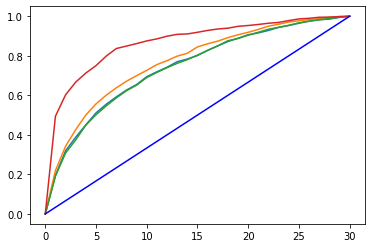

In [382]:
plt.plot(m1_gain)
plt.plot(m2_gain)
plt.plot(m3_gain)
plt.plot(m4_gain)
plt.plot([0,30],[0,1],'b')

### Profit estimation


##### Calculating profits for each model at different thresholds

In [348]:

## Profit dataframe for various thresholds
thd_cuts = 100
dfprofit = pd.DataFrame(np.linspace(0, 1, num=thd_cuts))
dfprofit.rename(columns={0: 'threshold'}, inplace=True)

In [349]:
for model_key in models:
    
    print(model_key + '...')
    
    ## Defining variables
    _model = models[model_key]['model']
    _df = models[model_key]['df']
    _features = _df[models[model_key]['features']]
    _label = _df[models[model_key]['label']]
    
    ## Obtaining key metrics for all cutoffs
    dfprofit[model_key] = dfprofit['threshold'].apply(
        lambda x: metrics.confusion_matrix(
            y_true=_label,
            y_pred=(_model.predict(_features) > x)*1,
        ).ravel()
    )
    
    ## Desaggregating results into columns
    dfprofit[
        [
            model_key + '_tn',  
            model_key + '_fp',  
            model_key + '_fn',  
            model_key + '_tp',
        ]
    ] = pd.DataFrame(dfprofit[model_key].tolist(), index=dfprofit.index)
    dfprofit.drop(model_key, axis=1, inplace=True)
    
    ## Adding some other model metrics
    dfprofit[model_key + '_prc'] = dfprofit[model_key + '_tp']/(dfprofit[model_key + '_tp'] + dfprofit[model_key + '_fp'])
    dfprofit[model_key + '_rcl'] = dfprofit[model_key + '_tp']/(dfprofit[model_key + '_tp'] + dfprofit[model_key + '_fn'])
    
    ## Calculating estimated profit
    dfprofit[model_key + '_profit'] = dfprofit[model_key + '_tp']*(60 - 1.41) - dfprofit[model_key + '_fp']*1.41
    
print('end!')

m1...
m2...
m3...
m4...


##### Visualizing results

In [ ]:
dfprofit

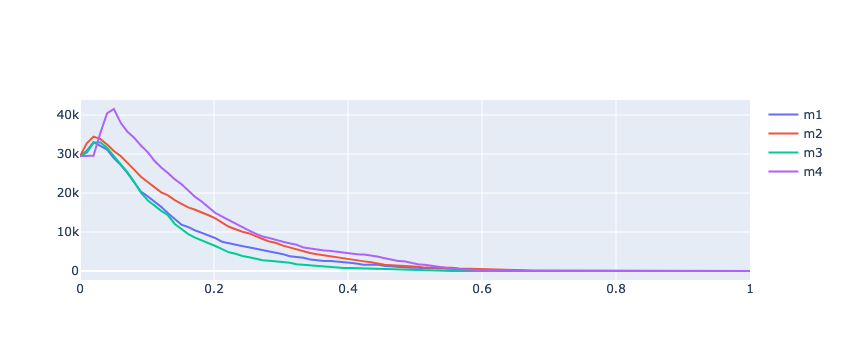

In [351]:
fig = go.Figure()

for model_key in models:

    fig.add_trace(
        go.Scatter(
            x=dfprofit['threshold'], 
            y=dfprofit[model_key + '_profit'],
            mode='lines',
            name=model_key
        )
    )
    
fig.show()

##### Obtaining best of each model

In [371]:
## Creating base dataframe (with benchmark) to store results
dfprofit_max = pd.DataFrame(
    columns=['tn', 'fp', 'fn', 'tp', 'prc', 'rcl', 'profit'],
    data=dfprofit.loc[
        dfprofit['threshold'] == 0,
        [col for col in dfprofit.columns if 'm1' in col]
    ].values,
    index=['benchmark'],
)


## Adding worst possible model
dfprofit_max.loc['m_worst', :] = [
    0, ## tn
    ((df['res1'] == 0)*1).sum(), ## fp
    ((df['res1'] == 1)*1).sum(), ## fn
    0, ## tp
    0/(0 + ((df['res1'] == 0)*1).sum()), ## prc -> tp/(tp + fp)
    0/(0 + ((df['res1'] == 1)*1).sum()), ## rcl -> tp/(tp + fn)
    0*(60 - 1.41) - ((df['res1'] == 0)*1).sum()*(1.41), ## profit
]

## Adding best possible model
dfprofit_max.loc['m_best', :] = [
    ((df['res1'] == 0)*1).sum(), ## tn 
    0, ## fp
    0, ## fn
    ((df['res1'] == 1)*1).sum(), ## tp
    ((df['res1'] == 1)*1).sum()/(((df['res1'] == 1)*1).sum() + 0), ## prc -> tp/(tp + fp)
    ((df['res1'] == 1)*1).sum()/(((df['res1'] == 1)*1).sum() + 0), ## rcl -> tp/(tp + fn)
    ((df['res1'] == 1)*1).sum()*(60 - 1.41) - 0*1.41, ## profit
]


## Finding best results for each model
for model_key in models:
    
    mr = dfprofit[model_key + '_profit'] == dfprofit[model_key + '_profit'].max()
    rc = [col for col in dfprofit.columns if model_key in col]

    dfprofit_max.loc[model_key, :] = dfprofit.loc[mr, rc].values

In [378]:
dfprofit_max

,tn,fp,fn,tp,prc,rcl,profit
benchmark,0.0,19039.0,0.0,961.0,0.048050,1.000000,29460.00
m_worst,0.0,19039.0,961.0,0.0,0.000000,0.000000,-26844.99
m_best,19039.0,0.0,0.0,961.0,1.000000,1.000000,56304.99
m1,5961.0,13078.0,82.0,879.0,0.062979,0.914672,33060.63
m2,7376.0,11663.0,92.0,869.0,0.069342,0.904266,34469.88
m3,8670.0,10369.0,148.0,813.0,0.072706,0.845994,33013.38
m4,15270.0,3769.0,161.0,800.0,0.175093,0.832466,41557.71


### Precision recall metrics

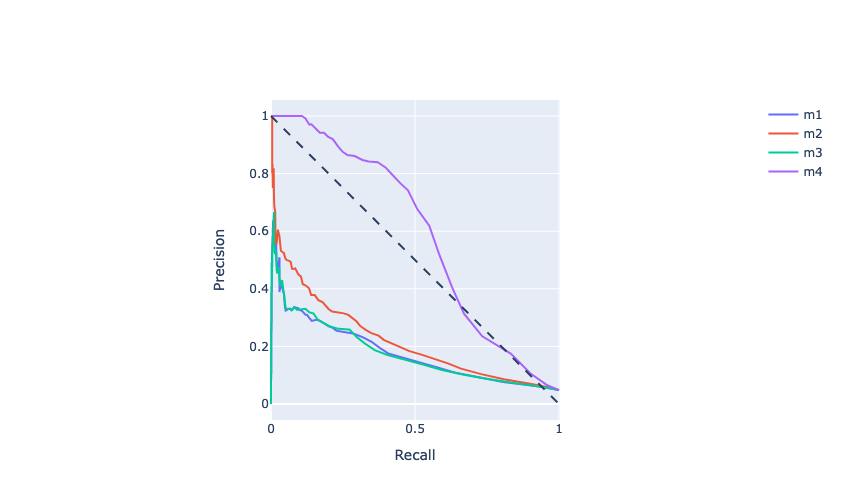

In [335]:
fig = go.Figure()

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)


for model_key in models:
    
    fig.add_trace(
        go.Scatter(
            x=dfprofit[model_key + '_rcl'], 
            y=dfprofit[model_key + '_prc'],
            mode='lines',
            name=model_key
        )
    )
    

fig.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)

fig.show()

# 

# *Notes*

- TP: customers contacted that upgraded
- FP: customers contacted that didn't upgraded
- TN: customers not contacted that woudn't updgrade
- FN: customers not contacted that would upgrade

Notes on calculating profits

Calculate the best threshold to define a category and estimate values accordingly
- Precision (Response ratio): TP/(TP + FP)
- Graph
    - y: response ratio; 
    - x: cutoff
- Profit (observed)
    - TP*(60 - 1.41) - FP*1.41
    - TP*60 - TP*1.41 - FP*1.41
    - TP*60 - 1.41*(TP + FP)
- Profit (strict)
    - TP*(60 - 1.41) + TN*1.41 - FP*1.41 - FN*60
    - TP*60 - TP*1.41 + TN*1.41 - FP*1.41 - FN*60
    - 1.41*(TN - TP - FP) + 60*(TP - FN)

#### Validating the break even response

In [ ]:
60*100*0.0235 - 100*1.41

0.0

In [ ]:
(100)*(60*x - 1.41) = 0

TP + FP

$$
profit = 60*rr - 1.41
$$

In [36]:
1.41/(60)

0.0235

#### Validating the income generated by first wave

In [ ]:
cust_tot = 801821

#### Plotly express histogram documentation

histnorm: str (default `None`)
    One of `'percent'`, `'probability'`, `'density'`, or `'probability
    density'` If `None`, the output of `histfunc` is used as is. If
    `'probability'`, the output of `histfunc` for a given bin is divided by
    the sum of the output of `histfunc` for all bins. If `'percent'`, the
    output of `histfunc` for a given bin is divided by the sum of the
    output of `histfunc` for all bins and multiplied by 100. If
    `'density'`, the output of `histfunc` for a given bin is divided by the
    size of the bin. If `'probability density'`, the output of `histfunc`
    for a given bin is normalized such that it corresponds to the
    probability that a random event whose distribution is described by the
    output of `histfunc` will fall into that bin.

---

---